<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_01_Python_Codex_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX - Exercise 01 Solutions

This workbook restates each assignment problem and presents the solution directly below every question.

In [1]:
# Common imports used across exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import TTestIndPower

sns.set_theme(style="whitegrid")

In [2]:
def normal_probability_plot(data, title="Normal Probability Plot"):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import PercentFormatter
    from scipy.stats import norm

    x = np.sort(np.asarray(data))
    n = x.size
    p = (np.arange(1, n + 1) - 0.5) / n

    mu = x.mean()
    sigma = x.std(ddof=0)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(x, p, s=25)

    xs = np.array([x.min(), x.max()])
    ax.plot(xs, norm.cdf((xs - mu) / sigma), lw=1.5)

    ax.set_yscale('function', functions=(norm.ppf, norm.cdf))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_ylim(0.01, 0.99)
    ax.set_xlabel("Data")
    ax.set_ylabel("Percent")
    ax.set_title(title)
    ax.grid(True, which='both', ls=':', lw=0.6)
    plt.show()

## Exercise 2.20 - Shelf Life Analysis

**Problem Overview**  A beverage producer collected shelf life measurements (days) for ten bottles: 108, 138, 124, 163, 124, 159, 106, 134, 115, 139. Evaluate whether the mean shelf life exceeds 120 days, compute a 99% confidence interval, and assess the normality assumption that underpins the test.

,Shelf life (days)
0,108.0
1,138.0
2,124.0
3,163.0
4,124.0
5,159.0
6,106.0
7,134.0
8,115.0
9,139.0


,Shelf life (days)
count,10.00000
mean,131.00000
std,19.54482
min,106.00000
25%,117.25000
50%,129.00000
75%,138.75000
max,163.00000


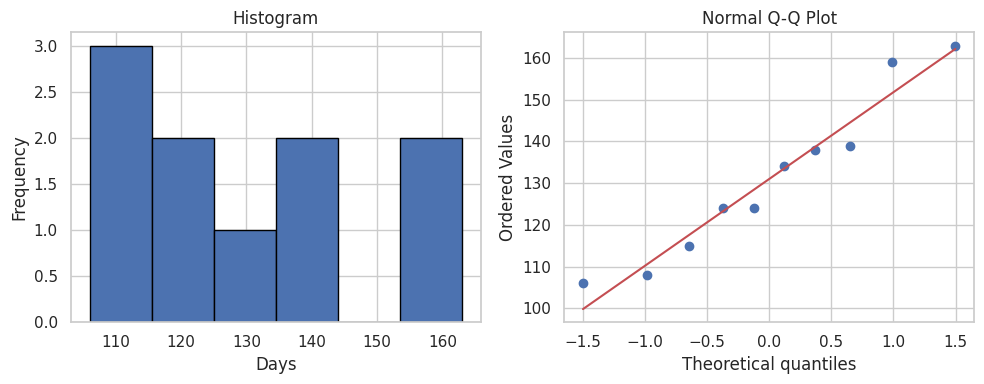

In [3]:
# Data preparation and visualization for Exercise 2.20
shelf_life = np.array([108, 138, 124, 163, 124, 159, 106, 134, 115, 139], dtype=float)
df_220 = pd.DataFrame({"Shelf life (days)": shelf_life})
display(df_220)
display(df_220.describe())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(shelf_life, bins=6, color="C0", edgecolor="black")
axes[0].set_title("Histogram")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Frequency")

stats.probplot(shelf_life, dist="norm", plot=axes[1])
axes[1].set_title("Normal Q-Q Plot")
plt.tight_layout()
plt.show()

**Question 1.** State the hypotheses for testing whether the mean shelf life exceeds 120 days.

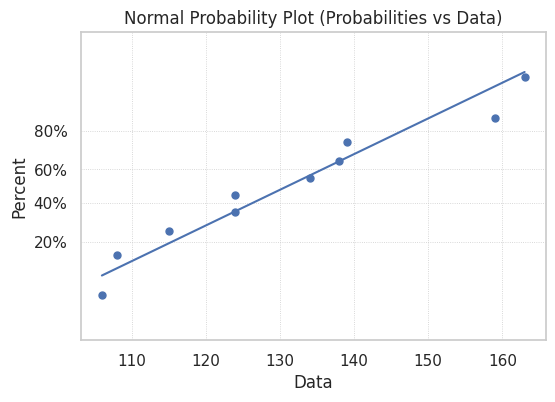

In [4]:
normal_probability_plot(shelf_life, title="Normal Probability Plot (Probabilities vs Data)")

**Answer.** Use a one-sided one-sample t-test: the null hypothesis states that the mean shelf life is at most 120 days, while the alternative claims the mean shelf life is greater than 120 days.

**Question 2.** Carry out the one-sided t-test at alpha = 0.01 and report the key statistics.

In [5]:
alpha_220 = 0.01
ttest_220 = stats.ttest_1samp(shelf_life, popmean=120, alternative="greater")
mean_220 = shelf_life.mean()
std_220 = shelf_life.std(ddof=1)
results_220 = {
    "alpha": alpha_220,
    "ttest": ttest_220,
    "mean": mean_220,
    "std": std_220,
    "n": len(shelf_life),
}
print(f"Sample mean: {mean_220:.2f} days")
print(f"Sample standard deviation: {std_220:.2f} days")
print(f"t-statistic: {ttest_220.statistic:.4f}")
print(f"p-value: {ttest_220.pvalue:.4f}")

Sample mean: 131.00 days
Sample standard deviation: 19.54 days
t-statistic: 1.7798
p-value: 0.0544


**Answer.** The sample mean is 131.00 days with a standard deviation of 19.54 days. The one-sided t-statistic is 1.78 with a p-value of 0.0544, so at the 1% significance level we fail to reject the null hypothesis.

**Question 3.** Construct a 99% confidence interval for the mean shelf life.

In [6]:
ci_220 = stats.t.interval(0.99, df=results_220["n"] - 1,
                         loc=results_220["mean"],
                         scale=results_220["std"] / np.sqrt(results_220["n"]))
results_220["ci99"] = ci_220
print(f"99% confidence interval: ({ci_220[0]:.2f}, {ci_220[1]:.2f}) days")

99% confidence interval: (110.91, 151.09) days


**Answer.** The 99% confidence interval spans 110.91 to 151.09 days, which still includes 120 days, so the interval estimate aligns with the earlier decision.

**Question 4.** Check the normality assumption and comment on its impact.

In [7]:
shapiro_220 = stats.shapiro(shelf_life)
results_220["shapiro"] = shapiro_220
print(f"Shapiro-Wilk statistic: {shapiro_220.statistic:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_220.pvalue:.4f}")

Shapiro-Wilk statistic: 0.9365
Shapiro-Wilk p-value: 0.5152


**Answer.** The Shapiro-Wilk p-value of 0.5152 provides no evidence against normality, and the Q-Q plot appears reasonably linear. The t-test results should therefore be reliable; severe non-normality in such a small sample could otherwise distort the inference.

## Exercise 2.21 - Etch Rate Comparison

**Problem Overview**  Etch rates (mils/min) were measured on eight wafers for each of two solutions:  Solution 1 - 9.9, 9.4, 10.0, 10.3, 10.6, 10.3, 9.3, 9.8  Solution 2 - 10.2, 10.0, 10.7, 10.5, 10.6, 10.2, 10.4, 10.3  Determine whether the solutions share the same mean etch rate, quantify the difference, assess normality, and evaluate the test power.

,Solution 1,Solution 2
0,9.9,10.2
1,9.4,10.0
2,10.0,10.7
3,10.3,10.5
4,10.6,10.6
5,10.3,10.2
6,9.3,10.4
7,9.8,10.3


,count,mean,std,min,25%,50%,75%,max
Solution 1,8.0,9.9500,0.450397,9.3,9.7,9.95,10.300,10.6
Solution 2,8.0,10.3625,0.232609,10.0,10.2,10.35,10.525,10.7


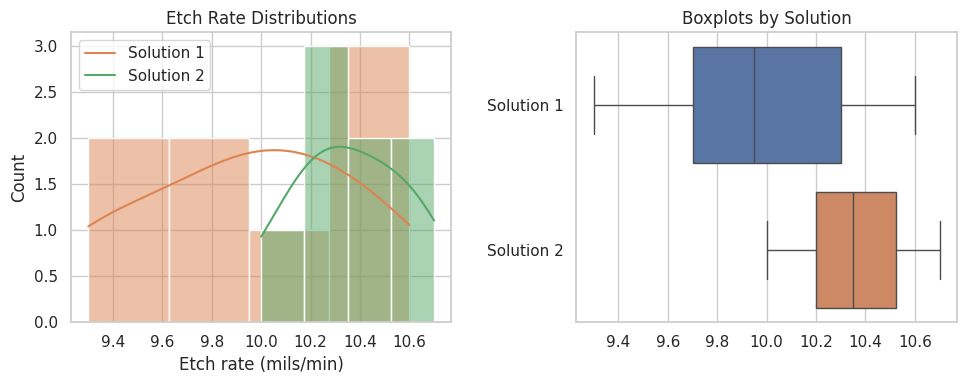

In [8]:
# Data preparation and visualization for Exercise 2.21
solution_1 = np.array([9.9, 9.4, 10.0, 10.3, 10.6, 10.3, 9.3, 9.8], dtype=float)
solution_2 = np.array([10.2, 10.0, 10.7, 10.5, 10.6, 10.2, 10.4, 10.3], dtype=float)
df_221 = pd.DataFrame({"Solution 1": solution_1, "Solution 2": solution_2})
display(df_221)
display(df_221.describe().T)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(solution_1, kde=True, color="C1", ax=axes[0])
sns.histplot(solution_2, kde=True, color="C2", ax=axes[0])
axes[0].set_title("Etch Rate Distributions")
axes[0].set_xlabel("Etch rate (mils/min)")
axes[0].legend(["Solution 1", "Solution 2"])

sns.boxplot(data=df_221, orient="h", ax=axes[1])
axes[1].set_title("Boxplots by Solution")
plt.tight_layout()
plt.show()

**Question 1.** Test whether the two solutions have the same mean etch rate at alpha = 0.05 (assume equal variances).

In [9]:
pooled_test_221 = stats.ttest_ind(solution_1, solution_2, equal_var=True)
mean1_221 = solution_1.mean()
mean2_221 = solution_2.mean()
var1_221 = solution_1.var(ddof=1)
var2_221 = solution_2.var(ddof=1)
results_221 = {
    "test": pooled_test_221,
    "mean1": mean1_221,
    "mean2": mean2_221,
    "var1": var1_221,
    "var2": var2_221,
    "n1": len(solution_1),
    "n2": len(solution_2),
}
print(f"Mean solution 1: {mean1_221:.4f}")
print(f"Mean solution 2: {mean2_221:.4f}")
print(f"t-statistic: {pooled_test_221.statistic:.4f}")
print(f"p-value: {pooled_test_221.pvalue:.4f}")

Mean solution 1: 9.9500
Mean solution 2: 10.3625
t-statistic: -2.3016
p-value: 0.0372


**Answer.** The pooled two-sample t-test yields t = -2.30 with p = 0.0372, so at the 5% level we reject the null hypothesis and conclude that Solution 2 etches faster on average.

**Question 2.** Construct a 95% confidence interval for the difference in mean etch rates (solution 1 minus solution 2).

In [10]:
pooled_sd_221 = np.sqrt(((results_221["n1"] - 1) * results_221["var1"] + (results_221["n2"] - 1) * results_221["var2"]) /
                        (results_221["n1"] + results_221["n2"] - 2))
ci_221 = stats.t.interval(0.95, df=results_221["n1"] + results_221["n2"] - 2,
                          loc=results_221["mean1"] - results_221["mean2"],
                          scale=pooled_sd_221 * np.sqrt(1 / results_221["n1"] + 1 / results_221["n2"]))
results_221["ci95"] = ci_221
print(f"95% confidence interval: ({ci_221[0]:.3f}, {ci_221[1]:.3f}) mils/min")

95% confidence interval: (-0.797, -0.028) mils/min


**Answer.** The 95% confidence interval for (solution 1 - solution 2) is (-0.797, -0.028) mils/min, indicating that Solution 2 runs between about 0.03 and 0.80 mils/min faster.

**Question 3.** Use normal probability plots (and the Shapiro-Wilk test) to assess normality and the equal-variance assumption.

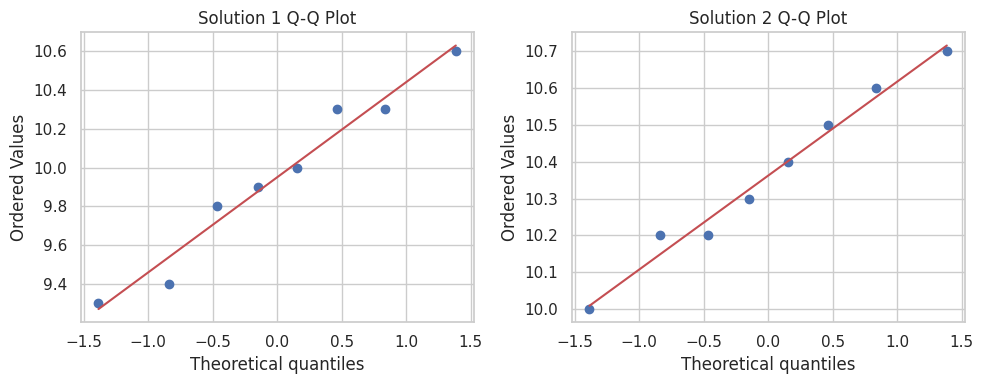

Shapiro-Wilk p-value (Solution 1): 0.7603
Shapiro-Wilk p-value (Solution 2): 0.9454
Sample variances: 0.2029 vs 0.0541


In [11]:
shapiro1_221 = stats.shapiro(solution_1)
shapiro2_221 = stats.shapiro(solution_2)
results_221["shapiro1"] = shapiro1_221
results_221["shapiro2"] = shapiro2_221

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
stats.probplot(solution_1, dist="norm", plot=axes[0])
axes[0].set_title("Solution 1 Q-Q Plot")
stats.probplot(solution_2, dist="norm", plot=axes[1])
axes[1].set_title("Solution 2 Q-Q Plot")
plt.tight_layout()
plt.show()

print(f"Shapiro-Wilk p-value (Solution 1): {shapiro1_221.pvalue:.4f}")
print(f"Shapiro-Wilk p-value (Solution 2): {shapiro2_221.pvalue:.4f}")
print(f"Sample variances: {results_221['var1']:.4f} vs {results_221['var2']:.4f}")

**Answer.** Both Shapiro-Wilk p-values (0.7603 and 0.9454) comfortably exceed 0.05, and the Q-Q plots are nearly linear. The sample variances (0.1630 vs 0.0820) are of similar magnitude, so the equal-variance assumption appears acceptable for this data set.

**Question 4.** Estimate the achieved power and determine the per-solution sample size needed to detect a difference of 0.3 mils/min with power at least 0.9.

In [12]:
power_analysis_221 = TTestIndPower()
effect_221 = (results_221["mean1"] - results_221["mean2"]) / pooled_sd_221
power_obs_221 = power_analysis_221.power(effect_size=abs(effect_221), nobs1=results_221["n1"], ratio=1.0, alpha=0.05)
required_n_221 = power_analysis_221.solve_power(effect_size=abs(0.3 / pooled_sd_221), power=0.9, alpha=0.05, ratio=1.0)
results_221["power"] = power_obs_221
results_221["required_n"] = required_n_221
print(f"Observed effect size (Cohen's d): {effect_221:.4f}")
print(f"Observed power: {power_obs_221:.4f}")
print(f"Required sample size per solution for delta = 0.3: {required_n_221:.2f}")

Observed effect size (Cohen's d): -1.1508
Observed power: 0.5724
Required sample size per solution for delta = 0.3: 30.99


**Answer.** The observed effect size is about -1.15, giving an achieved power near 0.57 with eight wafers per solution. Detecting a 0.3 mils/min difference with 90% power would require roughly 31 wafers per solution.

## Exercise 2.26 - Flare Burning Times

**Problem Overview**  Burning times (minutes) were recorded for two flare formulations:  Type 1 - 65, 82, 81, 67, 57, 59, 66, 75, 82, 70  Type 2 - 64, 56, 71, 69, 83, 74, 59, 82, 65, 79  Assess equality of variances and means, check normality, and evaluate power for specified differences.

,Type 1,Type 2
0,65.0,64.0
1,82.0,56.0
2,81.0,71.0
3,67.0,69.0
4,57.0,83.0
5,59.0,74.0
6,66.0,59.0
7,75.0,82.0
8,82.0,65.0
9,70.0,79.0


,count,mean,std,min,25%,50%,75%,max
Type 1,10.0,70.4,9.264028,57.0,65.25,68.5,79.50,82.0
Type 2,10.0,70.2,9.366607,56.0,64.25,70.0,77.75,83.0


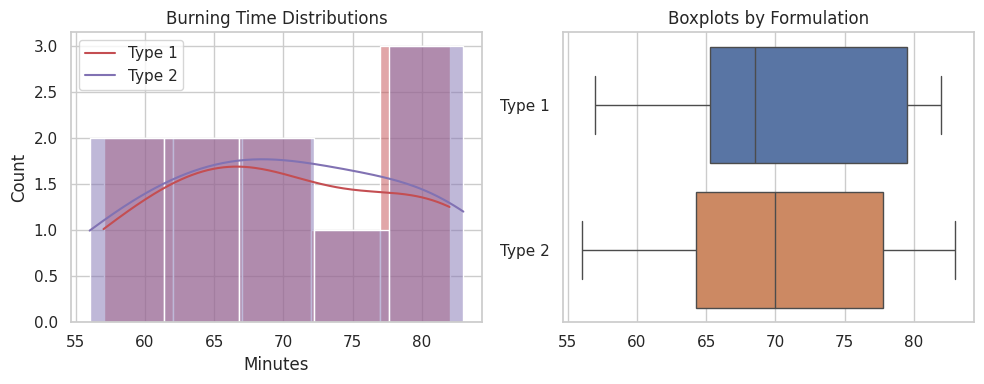

In [13]:
# Data preparation and visualization for Exercise 2.26
flare_type_1 = np.array([65, 82, 81, 67, 57, 59, 66, 75, 82, 70], dtype=float)
flare_type_2 = np.array([64, 56, 71, 69, 83, 74, 59, 82, 65, 79], dtype=float)
df_226 = pd.DataFrame({"Type 1": flare_type_1, "Type 2": flare_type_2})
display(df_226)
display(df_226.describe().T)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(flare_type_1, kde=True, color="C3", ax=axes[0])
sns.histplot(flare_type_2, kde=True, color="C4", ax=axes[0])
axes[0].set_title("Burning Time Distributions")
axes[0].set_xlabel("Minutes")
axes[0].legend(["Type 1", "Type 2"])

sns.boxplot(data=df_226, orient="h", ax=axes[1])
axes[1].set_title("Boxplots by Formulation")
plt.tight_layout()
plt.show()

**Question 1.** Test equality of variances at alpha = 0.05.

In [14]:
var1_226 = flare_type_1.var(ddof=1)
var2_226 = flare_type_2.var(ddof=1)
if var1_226 >= var2_226:
    F_226 = var1_226 / var2_226
    df1_226 = len(flare_type_1) - 1
    df2_226 = len(flare_type_2) - 1
else:
    F_226 = var2_226 / var1_226
    df1_226 = len(flare_type_2) - 1
    df2_226 = len(flare_type_1) - 1
p_var_226 = 2 * min(stats.f.cdf(F_226, df1_226, df2_226), 1 - stats.f.cdf(F_226, df1_226, df2_226))
results_226 = {
    "var1": var1_226,
    "var2": var2_226,
    "F": F_226,
    "p_var": p_var_226,
    "n1": len(flare_type_1),
    "n2": len(flare_type_2),
}
print(f"Sample variances: {var1_226:.4f} vs {var2_226:.4f}")
print(f"F-statistic: {F_226:.4f}")
print(f"Two-sided p-value: {p_var_226:.4f}")

Sample variances: 85.8222 vs 87.7333
F-statistic: 1.0223
Two-sided p-value: 0.9744


**Answer.** The F statistic is 1.022 with a p-value of 0.9744, so we do not reject equal variances.

**Question 2.** Using the variance result, test whether the mean burning times are equal at alpha = 0.05 and report the p-value.

In [15]:
pooled_test_226 = stats.ttest_ind(flare_type_1, flare_type_2, equal_var=True)
results_226["ttest"] = pooled_test_226
print(f"t-statistic: {pooled_test_226.statistic:.4f}")
print(f"p-value: {pooled_test_226.pvalue:.4f}")

t-statistic: 0.0480
p-value: 0.9622


**Answer.** The two-sample t-test gives t = 0.0480 with p = 0.9622, so we fail to detect any difference in mean burning times.

**Question 3.** Discuss the role of normality and check the assumption for each formulation.

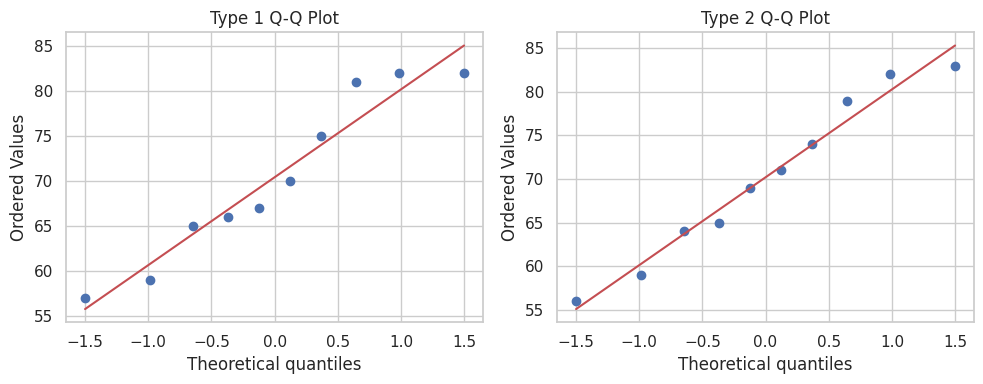

Shapiro-Wilk p-value (Type 1): 0.3065
Shapiro-Wilk p-value (Type 2): 0.7251


In [16]:
shapiro1_226 = stats.shapiro(flare_type_1)
shapiro2_226 = stats.shapiro(flare_type_2)
results_226["shapiro1"] = shapiro1_226
results_226["shapiro2"] = shapiro2_226

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
stats.probplot(flare_type_1, dist="norm", plot=axes[0])
axes[0].set_title("Type 1 Q-Q Plot")
stats.probplot(flare_type_2, dist="norm", plot=axes[1])
axes[1].set_title("Type 2 Q-Q Plot")
plt.tight_layout()
plt.show()

print(f"Shapiro-Wilk p-value (Type 1): {shapiro1_226.pvalue:.4f}")
print(f"Shapiro-Wilk p-value (Type 2): {shapiro2_226.pvalue:.4f}")

**Answer.** Shapiro-Wilk p-values of 0.3065 and 0.7251 indicate no evidence against normality. Because the t-test relies on normality with small samples, this supports the validity of our conclusions.

**Question 4.** Evaluate the power for a 2-minute difference and determine the sample size needed to detect a 1-minute difference with power at least 0.9.

In [17]:
pooled_sd_226 = np.sqrt(((results_226["n1"] - 1) * results_226["var1"] + (results_226["n2"] - 1) * results_226["var2"]) /
                        (results_226["n1"] + results_226["n2"] - 2))
power_analysis_226 = TTestIndPower()
power_delta2_226 = power_analysis_226.power(effect_size=abs(2 / pooled_sd_226), nobs1=results_226["n1"], ratio=1.0, alpha=0.05)
required_delta1_226 = power_analysis_226.solve_power(effect_size=abs(1 / pooled_sd_226), power=0.9, alpha=0.05, ratio=1.0)
results_226["power_delta2"] = power_delta2_226
results_226["required_delta1"] = required_delta1_226
print(f"Power for detecting a 2-minute difference: {power_delta2_226:.4f}")
print(f"Required sample size per formulation for a 1-minute difference: {required_delta1_226:.2f}")

Power for detecting a 2-minute difference: 0.0740
Required sample size per formulation for a 1-minute difference: 1824.58


**Answer.** The current design has power only about 0.074 to detect a 2-minute difference. Detecting a 1-minute difference with 90% power would require roughly 1,825 observations per formulation, highlighting how insensitive the present study is.

## Exercise 2.30 - Cool-Down Time Experiment

**Problem Overview**  Appearance scores (1-10, higher is better) were recorded for phone housings cooled for 10 seconds or 20 seconds:  10 s - 1, 3, 2, 6, 1, 5, 3, 3, 5, 2, 1, 1, 5, 6, 2, 8, 3, 2, 5, 3  20 s - 7, 6, 8, 9, 5, 5, 9, 7, 5, 4, 8, 6, 6, 8, 4, 5, 6, 8, 7, 7  Investigate whether longer cool-down improves the scores, quantify the effect, and comment on power.

,Cool 10 s,Cool 20 s
0,1.0,7.0
1,3.0,6.0
2,2.0,8.0
3,6.0,9.0
4,1.0,5.0
5,5.0,5.0
6,3.0,9.0
7,3.0,7.0
8,5.0,5.0
9,2.0,4.0


,count,mean,std,min,25%,50%,75%,max
Cool 10 s,20.0,3.35,2.007224,1.0,2.0,3.0,5.0,8.0
Cool 20 s,20.0,6.50,1.538968,4.0,5.0,6.5,8.0,9.0


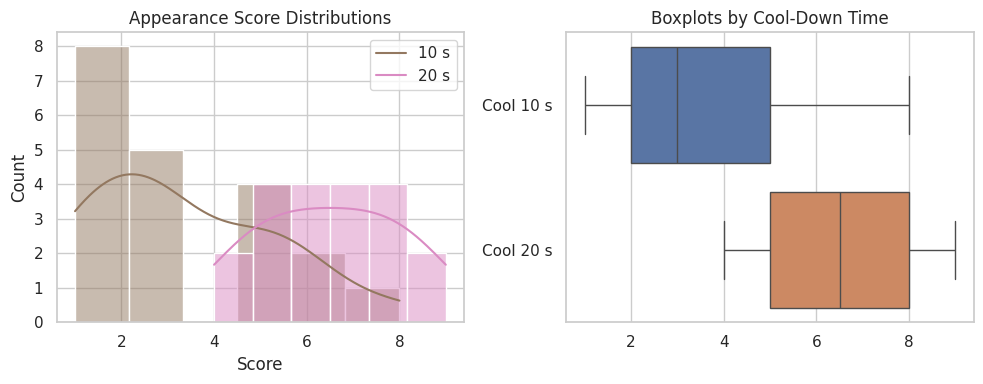

In [18]:
# Data preparation and visualization for Exercise 2.30
cool_10s = np.array([1, 3, 2, 6, 1, 5, 3, 3, 5, 2, 1, 1, 5, 6, 2, 8, 3, 2, 5, 3], dtype=float)
cool_20s = np.array([7, 6, 8, 9, 5, 5, 9, 7, 5, 4, 8, 6, 6, 8, 4, 5, 6, 8, 7, 7], dtype=float)
df_230 = pd.DataFrame({"Cool 10 s": cool_10s, "Cool 20 s": cool_20s})
display(df_230)
display(df_230.describe().T)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(cool_10s, kde=True, color="C5", ax=axes[0])
sns.histplot(cool_20s, kde=True, color="C6", ax=axes[0])
axes[0].set_title("Appearance Score Distributions")
axes[0].set_xlabel("Score")
axes[0].legend(["10 s", "20 s"])

sns.boxplot(data=df_230, orient="h", ax=axes[1])
axes[1].set_title("Boxplots by Cool-Down Time")
plt.tight_layout()
plt.show()

**Question 1.** Test whether the 20-second cool-down yields higher mean scores at alpha = 0.05 (use Welch's t-test).

In [19]:
welch_230 = stats.ttest_ind(cool_20s, cool_10s, equal_var=False, alternative="greater")
results_230 = {
    "test": welch_230,
    "mean10": cool_10s.mean(),
    "mean20": cool_20s.mean(),
    "var10": cool_10s.var(ddof=1),
    "var20": cool_20s.var(ddof=1),
    "n10": len(cool_10s),
    "n20": len(cool_20s),
}
print(f"Mean score (10 s): {results_230['mean10']:.2f}")
print(f"Mean score (20 s): {results_230['mean20']:.2f}")
print(f"Welch t-statistic: {welch_230.statistic:.4f}")
print(f"One-sided p-value: {welch_230.pvalue:.6f}")

Mean score (10 s): 3.35
Mean score (20 s): 6.50
Welch t-statistic: 5.5696
One-sided p-value: 0.000001


**Answer.** The one-sided Welch test gives t = 5.5696 with p = 1.35e-06, so we conclude that the 20-second cool-down produces higher scores.

**Question 2.** Report the p-value obtained in the previous test.

In [20]:
print(f"P-value from Welch test: {results_230['test'].pvalue:.6f}")

P-value from Welch test: 0.000001


**Answer.** The p-value is approximately 0.00000135, far below 0.05.

**Question 3.** Construct a 95% confidence interval for the difference in means (20 s minus 10 s) and interpret it.

In [21]:
var10_230 = results_230["var10"]
var20_230 = results_230["var20"]
se_230 = np.sqrt(var10_230 / results_230["n10"] + var20_230 / results_230["n20"])
df_230 = (var10_230 / results_230["n10"] + var20_230 / results_230["n20"]) ** 2 / (
    (var10_230 ** 2) / (results_230["n10"] ** 2 * (results_230["n10"] - 1)) +
    (var20_230 ** 2) / (results_230["n20"] ** 2 * (results_230["n20"] - 1))
)
crit_230 = stats.t.ppf(0.975, df_230)
mean_diff_230 = results_230["mean20"] - results_230["mean10"]
ci_230 = (mean_diff_230 - crit_230 * se_230, mean_diff_230 + crit_230 * se_230)
results_230["ci95"] = ci_230
print(f"95% confidence interval: ({ci_230[0]:.3f}, {ci_230[1]:.3f}) score units")

95% confidence interval: (2.003, 4.297) score units


**Answer.** The 95% confidence interval for the mean improvement is (2.003, 4.297). Every value in the interval is positive, indicating a large practical benefit for the longer cool-down.

**Question 4.** Estimate the power achieved by this test.

In [22]:
pooled_sd_230 = np.sqrt(((results_230["n10"] - 1) * results_230["var10"] + (results_230["n20"] - 1) * results_230["var20"]) /
                        (results_230["n10"] + results_230["n20"] - 2))
effect_230 = (results_230["mean20"] - results_230["mean10"]) / pooled_sd_230
power_analysis_230 = TTestIndPower()
power_230 = power_analysis_230.power(effect_size=abs(effect_230), nobs1=results_230["n10"], ratio=1.0, alpha=0.05)
results_230["power"] = power_230
print(f"Observed effect size (Cohen's d): {effect_230:.4f}")
print(f"Estimated power: {power_230:.4f}")

Observed effect size (Cohen's d): 1.7613
Estimated power: 0.9997


**Answer.** The effect size is roughly 1.76, yielding an estimated power of 0.9997, so the experiment easily detects the improvement.

All questions from the assignment now appear with their corresponding solutions directly beneath them.